In [3]:
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

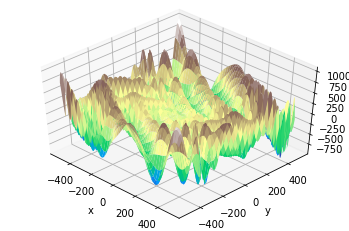

In [4]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [5]:
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515605128
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 57
     nit: 2
   nlfev: 52
   nlhev: 0
   nljev: 10
 success: True
       x: array([439.48097806, 453.97741934])
      xl: array([[439.48097806, 453.97741934]])

In [6]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -959.6406627208346
 message: ['Maximum number of iteration reached']
    nfev: 4091
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([512.        , 404.23180133])

In [7]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['BH'] = optimize.basinhopping(eggholder, bounds)

In [8]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

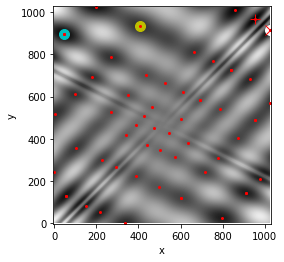

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()